In [1]:
import numpy as np
import pandas as pd
import MonteCarlo

c:\Users\jrkar\Git\MonteCarlo\MonteCarlo\MonteCarlo.py:103: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jackpotDF = pd.Series()


Scenario 1: 2-Headed Coin

1.1

In [2]:
cArray = np.array(['H', 'T'])

fCoin = MonteCarlo.Die(cArray)
uCoin = MonteCarlo.Die(cArray)

uCoin.setWeight('T', 5)

fCoin.seeDie()

,Face,Weight
0,H,1.0
1,T,1.0


In [3]:
uCoin.seeDie()

,Face,Weight
0,H,1.0
1,T,5.0


1.2 - 1.3

In [4]:
game1 = MonteCarlo.Game([fCoin, fCoin, fCoin])
game1.play(1000)
game2 = MonteCarlo.Game([uCoin, uCoin, fCoin])
game2.play(1000)

1.4

In [5]:
analyzer1 = MonteCarlo.Analyzer(game1)
analyzer1.jackpot()
analyzer1.jackpotDF.value_counts(normalize=True)

Jackpot?
False       0.774
True        0.226
dtype: float64

In [6]:
analyzer2 = MonteCarlo.Analyzer(game2)
analyzer2.jackpot()
analyzer2.jackpotDF.value_counts(normalize=True)

Jackpot?
False       0.649
True        0.351
dtype: float64

1.5

In [7]:
rf1 = analyzer1.jackpot() / 1000
rf2 = analyzer2.jackpot() / 1000

1.6

<AxesSubplot:>

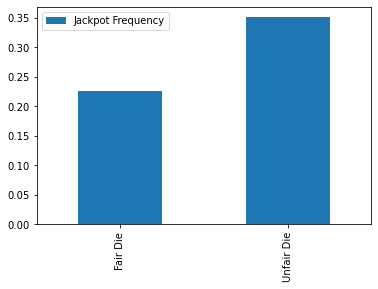

In [8]:
data = {'Jackpot Frequency': [rf1, rf2]}
rfDF = pd.DataFrame(data, index=['Fair Die', 'Unfair Die'])
rfDF.plot.bar()

Scenario 2: 6-Sided die

2.1

In [9]:
dArray = np.array([1,2,3,4,5,6])

fd1 = MonteCarlo.Die(dArray)
ud1 = MonteCarlo.Die(dArray)
ud1.setWeight(6, 5)
ud2 = MonteCarlo.Die(dArray)
ud2.setWeight(1, 5)

In [10]:
fd1.seeDie()

,Face,Weight
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


In [11]:
ud1.seeDie()

,Face,Weight
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


In [12]:
ud2.seeDie()

,Face,Weight
0,1,5.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


2.2

In [13]:
game1 = MonteCarlo.Game([fd1, fd1, fd1, fd1, fd1])
game1.play(10000)

2.3

In [14]:
game2 = MonteCarlo.Game([ud1, ud1, ud2, fd1, fd1])
game2.play(10000)

2.4

In [15]:
analyzer1 = MonteCarlo.Analyzer(game1)
analyzer1.jackpot()
analyzer1.jackpotDF.value_counts(normalize=True)

Jackpot?
False       0.9994
True        0.0006
dtype: float64

In [16]:
analyzer2 = MonteCarlo.Analyzer(game2)
analyzer2.jackpot()
analyzer2.jackpotDF.value_counts(normalize=True)

Jackpot?
False       0.9994
True        0.0006
dtype: float64

<AxesSubplot:>

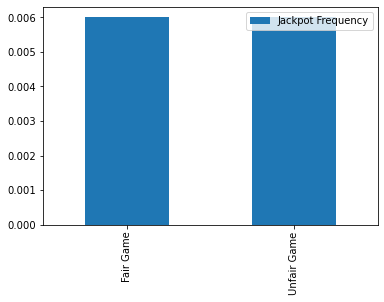

In [17]:
rf1 = analyzer1.jackpot() / 1000
rf2 = analyzer2.jackpot() / 1000

data = {'Jackpot Frequency': [rf1, rf2]}
rfDF = pd.DataFrame(data, index=['Fair Game', 'Unfair Game'])
rfDF.plot.bar()

2.5

<AxesSubplot:xlabel='Die 1,Die 2,Die 3,Die 4,Die 5'>

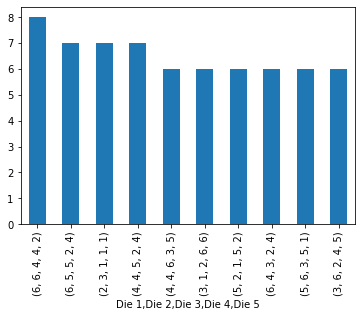

In [18]:
analyzer1.combo()[:10].plot.bar()

In [19]:
analyzer2.combo()[:10].plot.bar()

<AxesSubplot:xlabel='Die 1,Die 2,Die 3,Die 4,Die 5'>

Error in callback <function flush_figures at 0x0000021D79403D30> (for post_execute):


KeyboardInterrupt: 

Scenario 3: Roman Alphabet

3.1

In [ ]:
lArray = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
weightArray = np.array([8.4966,2.0720,4.5388,3.3844,11.1607,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893,3.0129,6.6544,7.1635,3.1671,0.1962,7.5809,5.7351,6.9509,3.6308,1.0074,1.2899,0.2902,1.7779,0.2722])

lettDie = MonteCarlo.Die(lArray)

for i in range(26):
    lettDie.setWeight(lArray[i], weightArray[i])

lettDie.seeDie()

,Face,Weight
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


2.2

In [ ]:
game1 = MonteCarlo.Game([lettDie,lettDie,lettDie,lettDie,lettDie])
game1.play(1000)

2.3

In [ ]:
analyzer1 = MonteCarlo.Analyzer(game1)
pd.options.display.max_rows = 2000
game1.show()

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll 1,M,R,O,O,C
Roll 2,N,E,I,I,N
Roll 3,I,L,R,A,A
Roll 4,O,E,D,U,H
Roll 5,I,Z,N,P,A
Roll 6,N,R,N,N,A
Roll 7,R,E,B,I,A
Roll 8,B,A,H,L,P
Roll 9,L,I,I,O,E
Roll 10,N,P,L,M,A


I couldn't find any combinations of 5 letters that made words, but I did see a few 4 letter words with an extra letter.

2.4

In [ ]:
game1.play(1000)
game1.show()

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll 1,I,E,L,E,T
Roll 2,C,S,U,O,I
Roll 3,R,E,E,S,C
Roll 4,N,U,E,C,T
Roll 5,M,T,O,P,H
Roll 6,U,E,A,K,U
Roll 7,A,G,D,T,E
Roll 8,A,N,R,I,Z
Roll 9,I,H,S,A,E
Roll 10,Y,C,F,A,R


Running the game 2 different times and looking over the results, the results I found for giving actual words was 1/2000.